In [2]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import graph_utils as gUtils
import pygraphviz as pgv
from networkx.drawing.nx_agraph import graphviz_layout

# all ordering, storing and naming will be in lexicographic order

parts = ["L","R","B","S"]

# parts = parts.sorted()
# print(parts)

hierarchy = {}
for r in range(1,len(parts)+1):
	inner_list = list(itertools.combinations(parts, r))
	hierarchy[r] = inner_list

G = nx.Graph()

for level in reversed(list(hierarchy.keys())):
	for node in hierarchy[level]:
		# node = set(node)
		nodeName = ""
		for s in node:
			nodeName += s
		# print(type(nodeName))
		G.add_node(nodeName,parts = node,level = level)

In [3]:
print(G.nodes["LBS"]["parts"])
print(G.nodes["LBS"]["level"])

('L', 'B', 'S')
3


In [4]:
my_set = set(G.nodes["LBS"]["parts"])
print(my_set)

{'L', 'B', 'S'}


In [5]:
# make a new graph
G2 = nx.Graph()

# convert all nodes to nodes with sets. 
for node in G.nodes(data=True):
    G2.add_node(node[0],parts = set(node[1]["parts"]),level = node[1]["level"])


print(G2.nodes["LBS"]["parts"])
print(G2.nodes["LBS"]["level"])


{'L', 'B', 'S'}
3


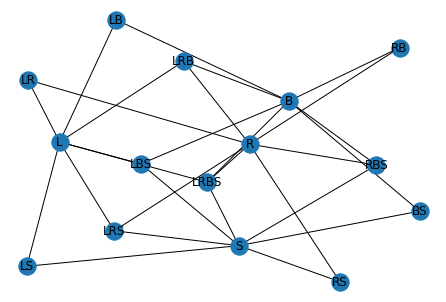

In [6]:
# iterating through one level nodes in G2
for node_name,node_data in G2.nodes(data=True):
    if node_data['level']==1:
        #iterating through all nodes above current level
        for upper_node_name,upper_node_data in G2.nodes(data=True):
            if upper_node_data['level'] > 1:
                # making edges if lower is subset of upper node
                if node_data["parts"].issubset(upper_node_data["parts"]):
                    G2.add_edge(node_name,upper_node_name)

nx.draw(G2,with_labels = True)

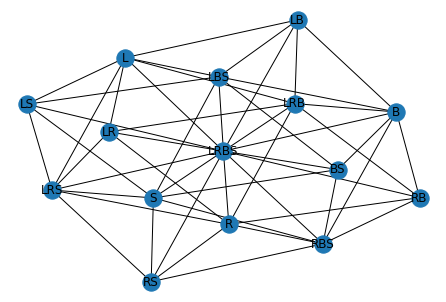

In [7]:
for level_num in range(1,4):
    # iterating through one level nodes in G2
    for node_name,node_data in G2.nodes(data=True):
        if node_data['level']==level_num:
            #iterating through all nodes above current level
            for upper_node_name,upper_node_data in G2.nodes(data=True):
                if upper_node_data['level'] > level_num:
                    # making edges if lower is subset of upper node
                    if node_data["parts"].issubset(upper_node_data["parts"]):
                        G2.add_edge(node_name,upper_node_name)

nx.draw(G2,with_labels = True)

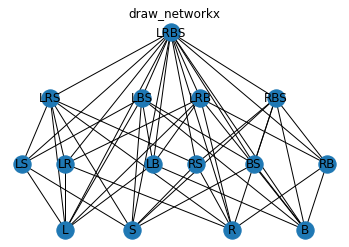

In [8]:
# write dot file to use with graphviz
# run "dot -Tpng test.dot >test.png"
nx.nx_agraph.write_dot(G2,'test.dot')

# same layout using matplotlib with no labels
plt.title('draw_networkx')
pos=graphviz_layout(G2, prog='dot')
nx.draw(G2, pos, with_labels=True, arrows=False)

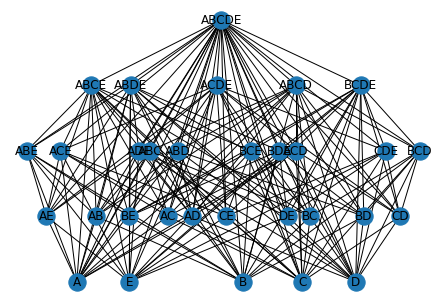

In [9]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import graph_utils as gUtils
import pygraphviz as pgv
from networkx.drawing.nx_agraph import graphviz_layout

# all ordering, storing and naming will be in lexicographic order

parts = ["A","B","C","D","E"]

# parts = parts.sorted()
# print(parts)

hierarchy = {}
for r in range(1,len(parts)+1):
	inner_list = list(itertools.combinations(parts, r))
	hierarchy[r] = inner_list

max_level = len(hierarchy)

G = nx.Graph()

for level in reversed(list(hierarchy.keys())):
	for node in hierarchy[level]:
		# node = set(node)
		nodeName = ""
		for s in node:
			nodeName += s
		# print(type(nodeName))
		G.add_node(nodeName,parts = node,level = level)

# make a new graph
G2 = nx.Graph()

# convert all nodes to nodes with sets. 
for node in G.nodes(data=True):
    G2.add_node(node[0],parts = set(node[1]["parts"]),level = node[1]["level"])

for level_num in range(1,max_level):
    # iterating through one level nodes in G2
    for node_name,node_data in G2.nodes(data=True):
        if node_data['level']==level_num:
            #iterating through all nodes above current level
            for upper_node_name,upper_node_data in G2.nodes(data=True):
                if upper_node_data['level'] > level_num:
                    # making edges if lower is subset of upper node
                    if node_data["parts"].issubset(upper_node_data["parts"]):
                        G2.add_edge(node_name,upper_node_name)

# write dot file to use with graphviz
# run "dot -Tpng test.dot >test.png"
nx.nx_agraph.write_dot(G2,'test.dot')

# same layout using matplotlib with no labels
pos=graphviz_layout(G2, prog='dot')
nx.draw(G2, pos, with_labels=True, arrows=False)

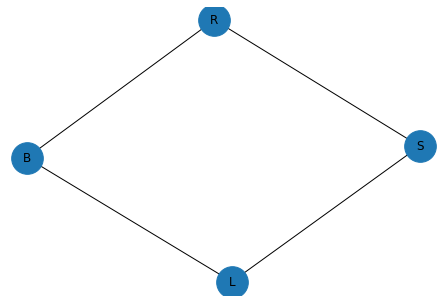

In [13]:
# feasible fit graph
# for ABCDE chain link system
ff_graph = nx.Graph()
# ff_graph.add_edges_from([("A","B"),("B","C"),("C","D"),("D","E"),("A","E")])
ff_graph.add_edges_from([("L","B"),("L","S"),("R","B"),("R","S")])

nx.draw(ff_graph, with_labels=True, arrows=False,node_size = 1000)

In [11]:
H = ff_graph.subgraph(set(["A","E","C"]))
print(list(H.edges))
print(nx.is_connected(H))
nx.draw(H, with_labels=True, arrows=False)


[]


NetworkXPointlessConcept: ('Connectivity is undefined ', 'for the null graph.')

In [77]:
nx.is_connected(G)

False

In [78]:
to_be_removed = []
for node in G2.nodes(data=True):
    if not gUtils.infeasible_reject(node,ff_graph):
        to_be_removed.append(node[0])
G2.remove_nodes_from(to_be_removed)

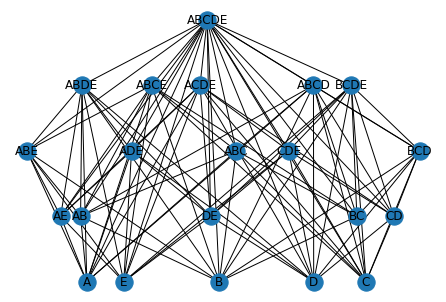

In [79]:
# write dot file to use with graphviz
# run "dot -Tpng test.dot >test.png"
nx.nx_agraph.write_dot(G2,'test.dot')

# same layout using matplotlib with no labels
pos=graphviz_layout(G2, prog='dot')
nx.draw(G2, pos, with_labels=True, arrows=False)